In [1]:
import torch
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

In [4]:
path = '/fast_scratch/atlas_images/'
p0 = np.load(path+"pi0.npz")
pp = np.load(path+"piplus.npz")
pm = np.load(path+"piminus.npz")

In [5]:
for k in p0.keys():
    print(k)

TileBar2
EMB3
cluster_sumCellE
TileBar1
TileBar0
cluster_nCells
clusterPt
label
clusterEta
EMB1
cluster_emProb
clusterPhi
EMB2
clusterE


In [6]:
p0['label']

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [7]:
pp['label']

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [8]:
pm['label']

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [9]:
p0['TileBar0'].shape

(186818, 4, 4)

In [10]:
sums_p0=np.sum(p0['TileBar0'],axis=(1,2))+np.sum(p0['TileBar1'],axis=(1,2))+np.sum(p0['TileBar2'],axis=(1,2))+np.sum(p0['EMB1'],axis=(1,2))+np.sum(p0['EMB2'],axis=(1,2))+np.sum(p0['EMB3'],axis=(1,2))

In [11]:
sums_pp=np.sum(pp['TileBar0'],axis=(1,2))+np.sum(pp['TileBar1'],axis=(1,2))+np.sum(pp['TileBar2'],axis=(1,2))+np.sum(pp['EMB1'],axis=(1,2))+np.sum(pp['EMB2'],axis=(1,2))+np.sum(pp['EMB3'],axis=(1,2))

In [12]:
#import matplotlib
#matplotlib.rcParams['text.usetex'] = True

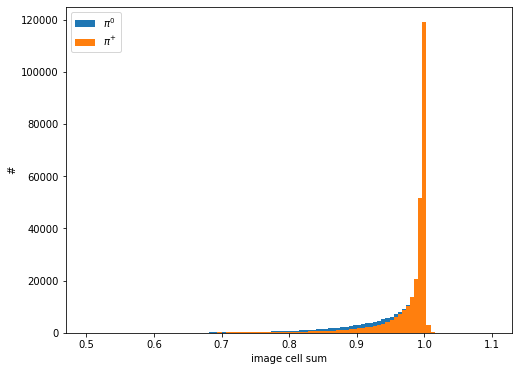

In [17]:
fig, ax=plt.subplots(figsize=(8, 6))
bins=np.linspace(0.5,1.1,100)
H1=plt.hist(sums_p0, label=r'$\pi^{0}$',bins=bins)
H2=plt.hist(sums_pp, label=r'$\pi^{+}$',bins=bins)
plt.legend(loc='upper left')
ax.set_xlabel('image cell sum')
ax.set_ylabel('#')
plt.show()


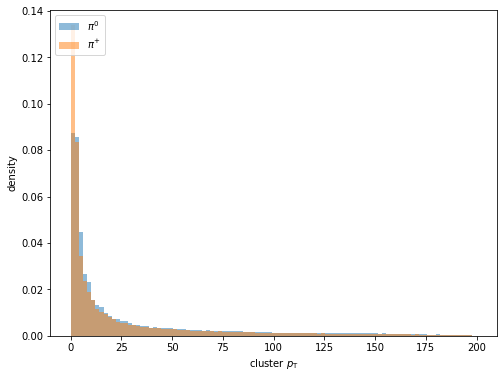

In [25]:
fig, ax=plt.subplots(figsize=(8, 6))
bins=np.linspace(0,200,100)# None #np.linspace(0.5,1.1,100)
H1=plt.hist(p0['clusterPt'], label=r'$\pi^{0}$', alpha=0.5,bins=bins,density=True)
H2=plt.hist(pp['clusterPt'], label=r'$\pi^{+}$', alpha=0.5,bins=bins,density=True)
plt.legend(loc='upper left')
ax.set_xlabel(r'cluster $p_{\mathrm{T}}$')
ax.set_ylabel('density')
plt.show()

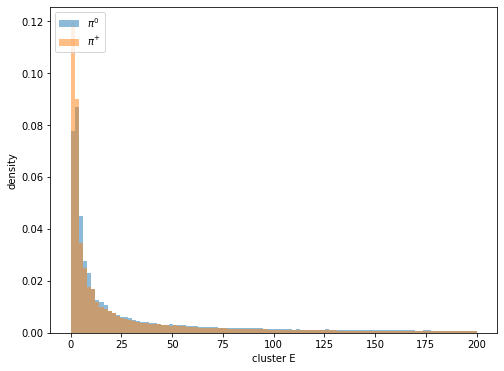

In [29]:
fig, ax=plt.subplots(figsize=(8, 6))
bins= np.linspace(0,200,100)
H1=plt.hist(p0['clusterE'], label=r'$\pi^{0}$', alpha=0.5,bins=bins,density=True)
H2=plt.hist(pp['clusterE'], label=r'$\pi^{+}$', alpha=0.5,bins=bins,density=True)
plt.legend(loc='upper left')
ax.set_xlabel('cluster E')
ax.set_ylabel('density')
plt.show()

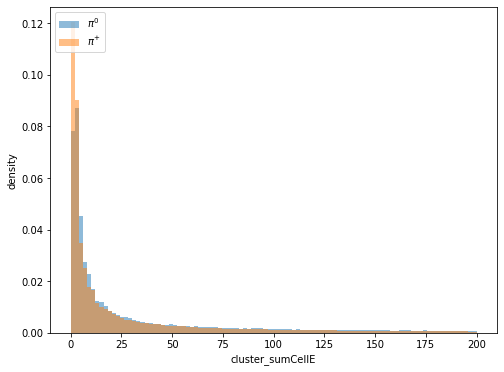

In [35]:
fig, ax=plt.subplots(figsize=(8, 6))
bins=np.linspace(0,200,100)
H1=plt.hist(p0['cluster_sumCellE'], label=r'$\pi^{0}$', alpha=0.5,bins=bins,density=True)
H2=plt.hist(pp['cluster_sumCellE'], label=r'$\pi^{+}$', alpha=0.5,bins=bins,density=True)
plt.legend(loc='upper left')
ax.set_xlabel('cluster_sumCellE')
ax.set_ylabel('density')
plt.show()

In [33]:
np.average(pp['clusterE'])

26.457165218157005

In [9]:
file_names=['pi0','piplus']
layer_names=['EMB1','EMB2','EMB3','TileBar0','TileBar1','TileBar2']
np_file_list=[np.load(path+f+'.npz') for f in file_names]

In [10]:
data_arrs={}

In [11]:
for l in layer_names:
    data_arrs[l]=np.concatenate([file[l] for file in np_file_list],axis=0)
    

In [12]:
data_arrs['TileBar2'].dtype

dtype('float64')

In [13]:
quant_names=['cluster_sumCellE', 
             'cluster_nCells', 
             'clusterPt', 
             'clusterEta', 
             'cluster_emProb', 
             'clusterPhi', 
             'clusterE']
        
quant_arrs={}
for q in quant_names:
    quant_arrs[q]=np.concatenate([file[q].astype(np.float32) for file in np_file_list],axis=0)

In [14]:
quant_arrs['cluster_sumCellE'].dtype

dtype('float32')

In [15]:
labels=np.concatenate([file['label'] for file in np_file_list],axis=0)

In [16]:
labels.dtype

dtype('int64')

In [17]:
labels.shape[0]

473521

In [18]:
np.all(np.asarray([data_arrs[k].shape[0] for k in  layer_names])==labels.shape[0])

True

In [19]:
from skimage.transform import resize

In [20]:
data_arrs[layer_names[0]][0].shape

(128, 4)

In [21]:
data_arrs[layer_names[1]][0].shape

(16, 16)

In [45]:
data_arrs[layer_names[2]][0].shape

(8, 16)

In [23]:
data_arrs[layer_names[4]][0].shape

(4, 4)

In [24]:
resize(data_arrs[layer_names[4]][0],(128,16))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
%matplotlib inline

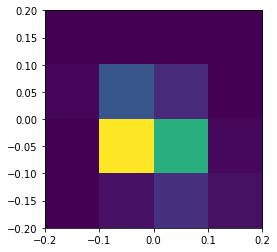

In [27]:
plt.imshow(data_arrs[layer_names[4]][200000],extent=[-0.2,0.2,-0.2,0.2])

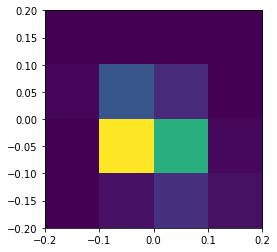

In [28]:
plt.imshow(resize(data_arrs[layer_names[4]][200000],(128,16),preserve_range=True, anti_aliasing=False,anti_aliasing_sigma=None,order=0),interpolation='none', extent=[-0.2,0.2,-0.2,0.2])

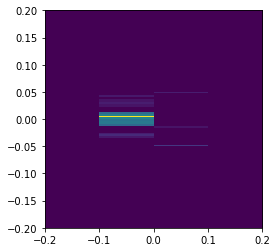

In [29]:
plt.imshow(data_arrs[layer_names[0]][200000],extent=[-0.2,0.2,-0.2,0.2])

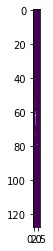

In [30]:
plt.imshow(data_arrs[layer_names[0]][200000],)

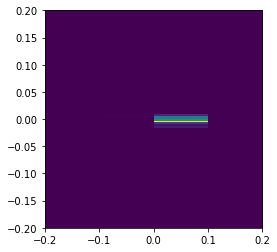

In [31]:
plt.imshow(data_arrs[layer_names[0]][8003],extent=[-0.2,0.2,-0.2,0.2])

In [32]:
from matplotlib.colors import Normalize, LogNorm


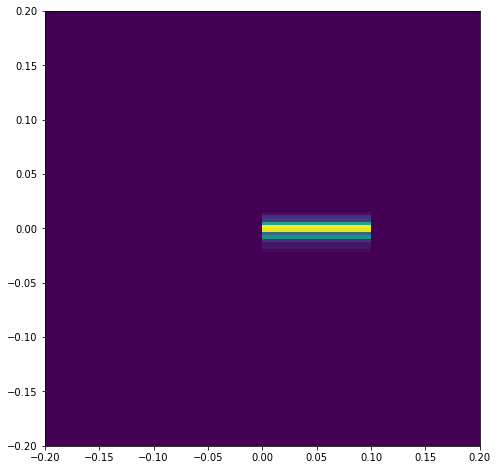

In [33]:
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(data_arrs[layer_names[0]][14003],extent=[-0.2,0.2,-0.2,0.2],norm=Normalize())

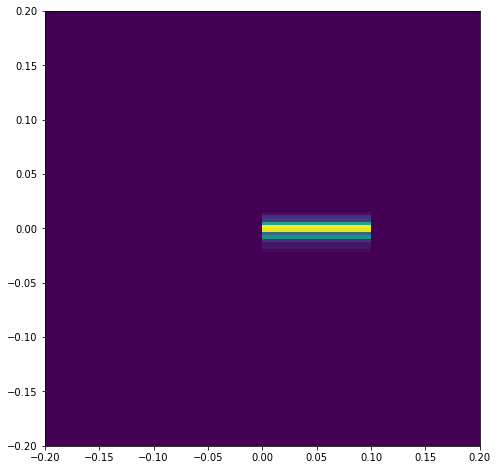

In [34]:
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(resize(data_arrs[layer_names[0]][14003],(128,16),preserve_range=True, anti_aliasing=False,anti_aliasing_sigma=None,order=0),extent=[-0.2,0.2,-0.2,0.2],norm=Normalize())

In [46]:
index=414003
d_current=np.asarray([resize(data_arrs[l][index],
                      (128,16),preserve_range=True,
                      anti_aliasing=False,anti_aliasing_sigma=None,order=0) for l in layer_names])

In [47]:
d_current

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [48]:
d_current.shape

(6, 128, 16)

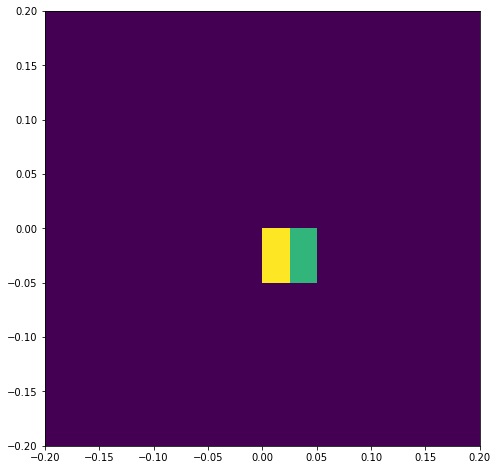

In [49]:
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(d_current[2],extent=[-0.2,0.2,-0.2,0.2],norm=Normalize())

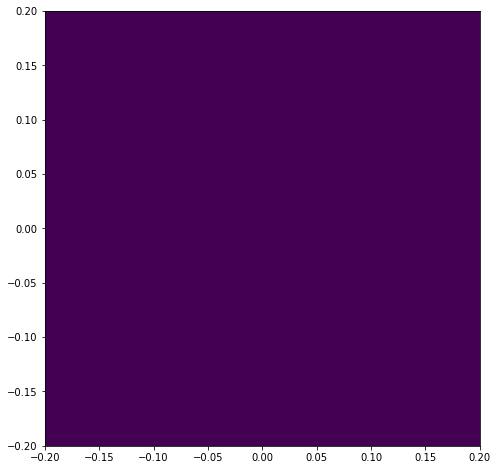

In [51]:
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(d_current[1],extent=[-0.2,0.2,-0.2,0.2])

In [52]:
len(labels)

473521

In [53]:
from numpy.random import randint

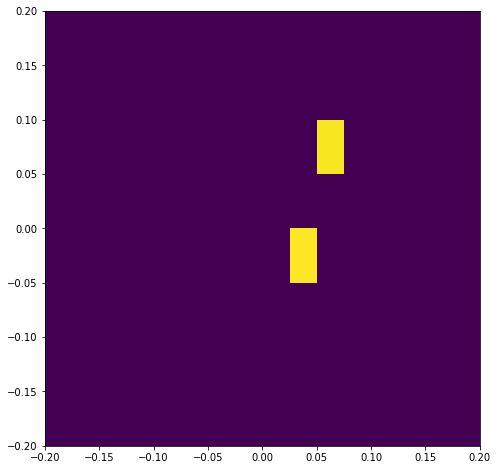

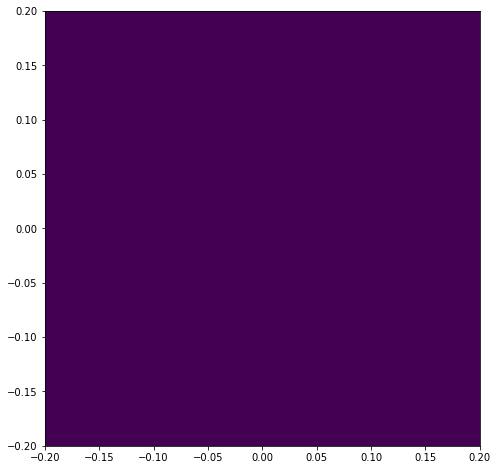

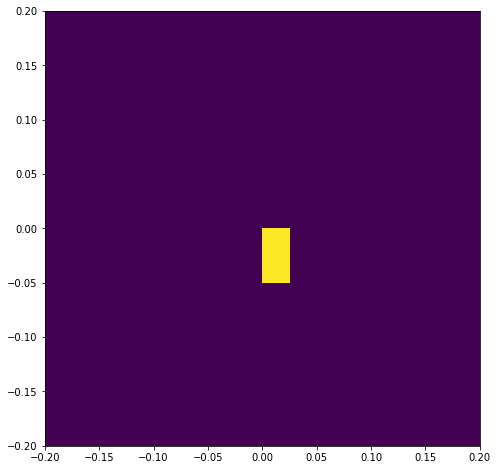

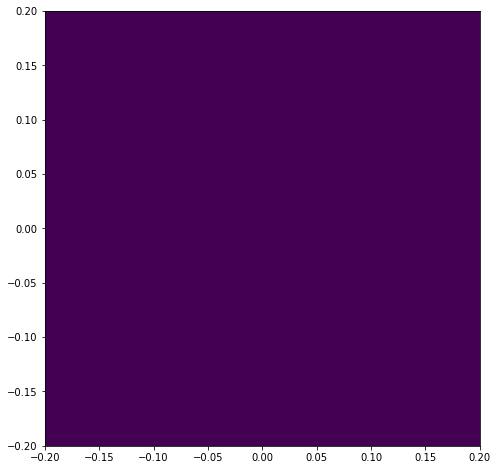

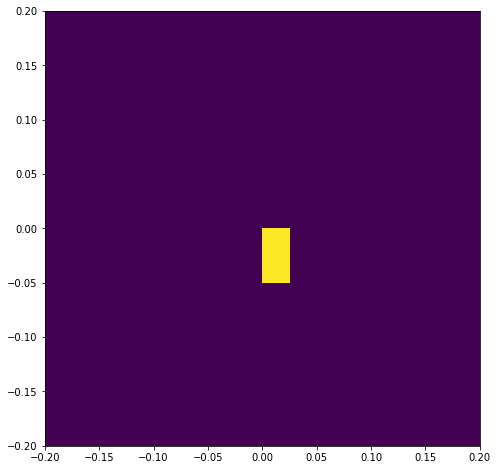

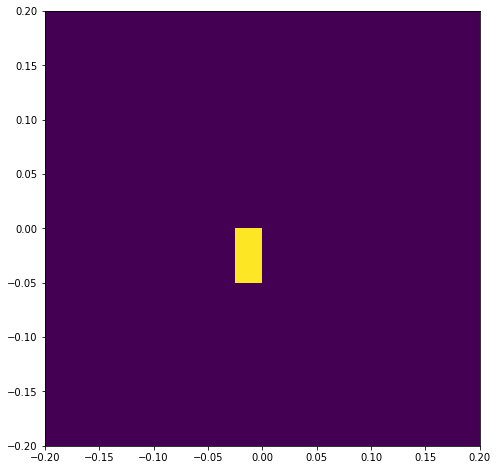

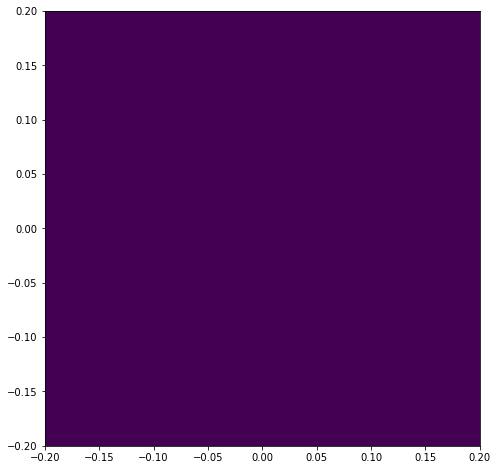

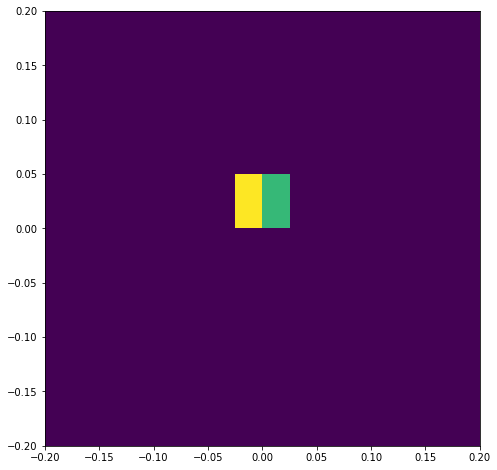

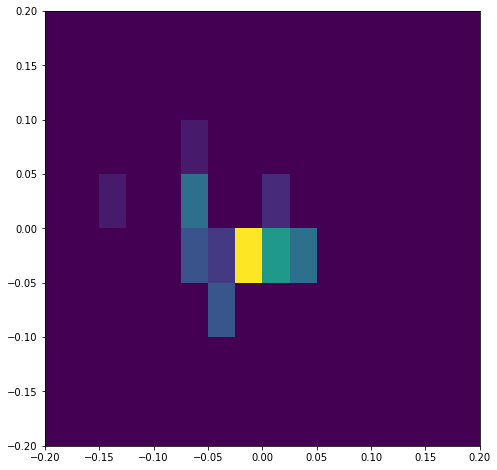

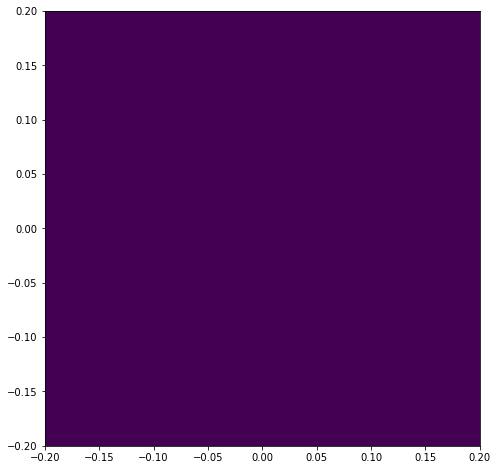

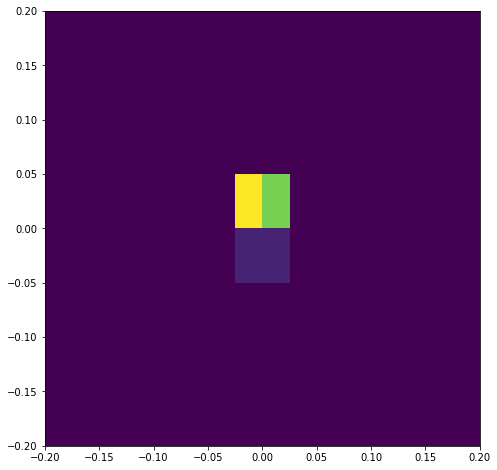

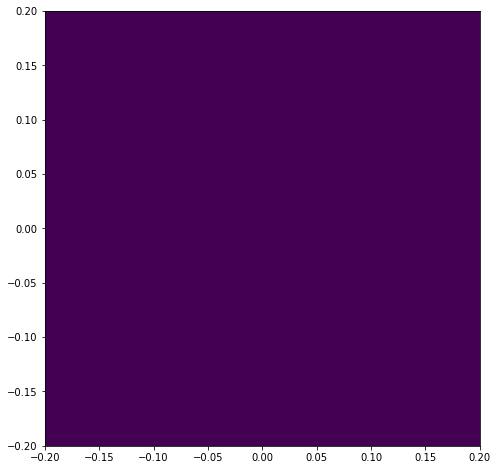

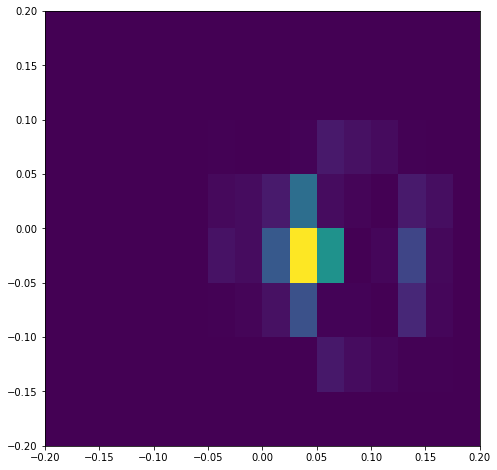

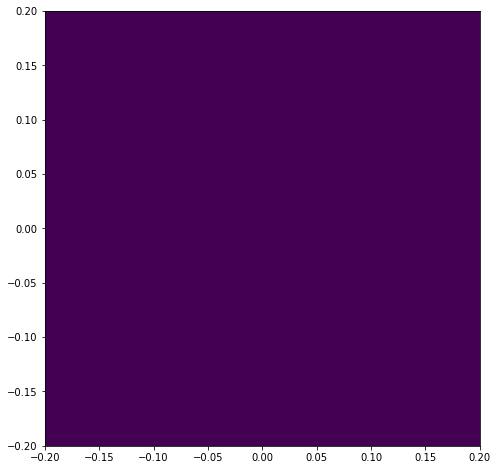

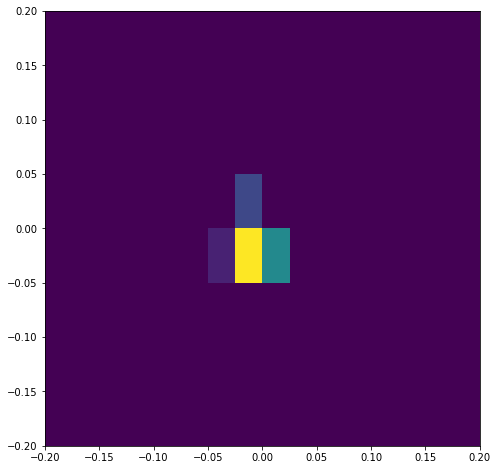

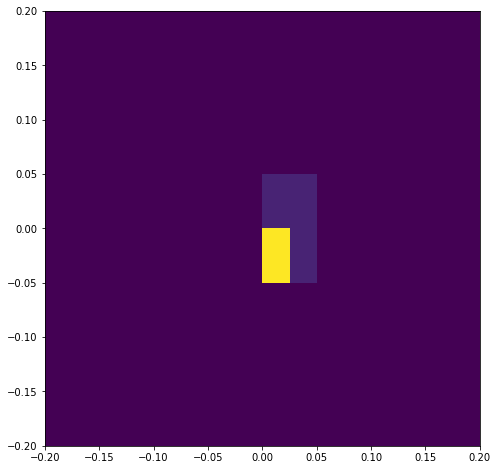

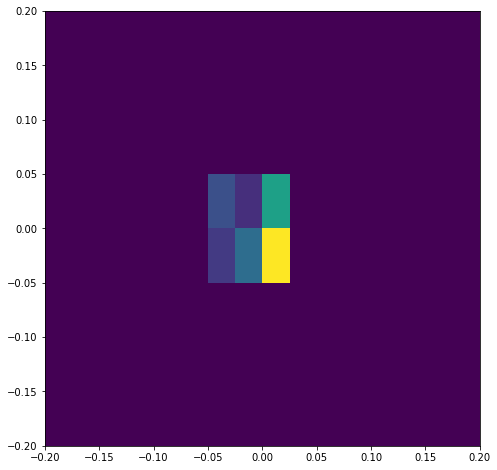

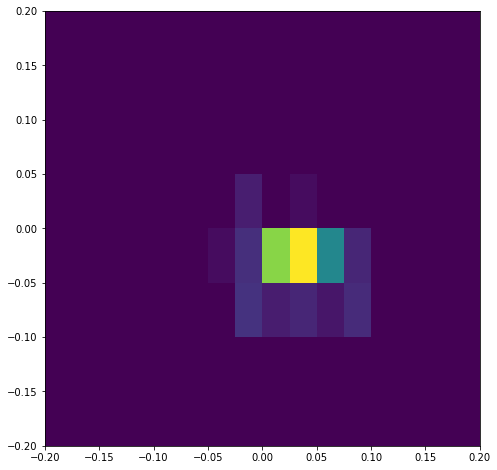

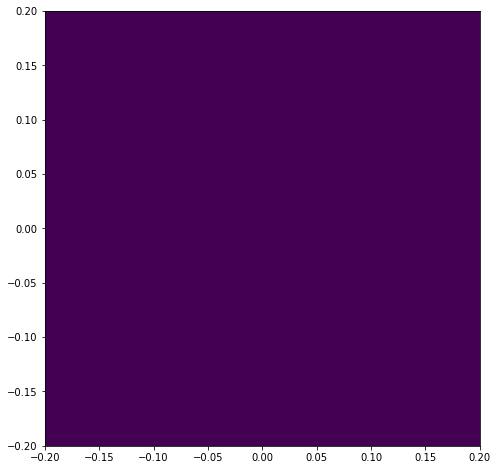

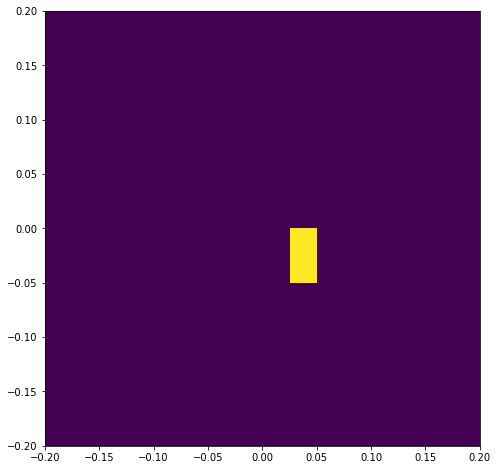

In [58]:
for i in range(20):
    index=randint(0,473521)
    d_current=np.asarray([resize(data_arrs[l][index],
                          (128,16),preserve_range=True,
                          anti_aliasing=False,anti_aliasing_sigma=None,order=0) for l in layer_names])
    fig, ax = plt.subplots(figsize=(8,8))
    plt.imshow(d_current[2],extent=[-0.2,0.2,-0.2,0.2])
    